In [12]:
#calling the liraries
import numpy as np
import pandas as pd
df=pd.read_excel("youth_unemployed.xlsx",skiprows=5)
print(df.shape)
#editing pandas's result ploting 
pd.set_option("display.max_rows", 192)
pd.set_option("display.max_columns", 8)
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import gc
import warnings
warnings.filterwarnings("ignore")
Dataoriginale=df

(1241, 8)


In [13]:
#counting each value of the source column in the dataset
df["Source"].value_counts()

LFS - EU Labour Force Survey                                                                        394
LFS - Labour Force Survey                                                                           302
ILO - ILO Modelled Estimates                                                                        110
LFS - Household Labour Force Survey                                                                  18
HIES - Household Income and Expenditure Survey                                                       17
LFS - National Labour Force Survey                                                                   14
HS - Encuesta de Hogares de Propósitos Múltiples                                                     13
LFS - Employment and Unemployment Survey                                                             13
HS - Encuesta Nacional de Hogares                                                                    13
LFS - Encuesta de Mercado Laboral                               

In [14]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#calculating the ratio of null vallues in each column

Reference area - 0%
Source - 0%
Time - 0%
Total - 0%
Male - 1%
Female - 1%
Other - 100%
Unnamed: 7 - 11%


In [15]:
df.columns


Index(['Reference area', 'Source', 'Time', 'Total', 'Male', 'Female', 'Other',
       'Unnamed: 7'],
      dtype='object')

<AxesSubplot:>

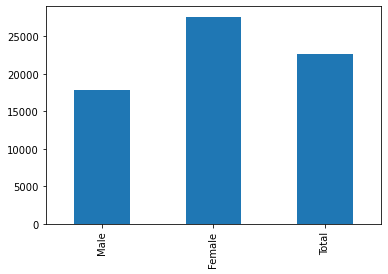

In [16]:
#Visulisation of each gender class 
df1=pd.concat([df['Male'],df['Female']],axis=1)
df1=pd.concat([df1,df["Total"]],axis=1)
df1.sum().plot.bar()

In [17]:
#you can check the values for each year for each country by hovering on the suitable color respecting the legend given on the right
#data visualisation
#the pourcentatge of males not educated employeed or into a training using the accumulator coefficicient
fig=px.bar(df,x="Reference area",y="Male",color="Time",hover_data=["Male"])
fig.show()

In [18]:
#you can check the values for each year for each country by hovering on the suitable color respecting the legend given on the right
#the  pourcentatge of femelles not educated employeed or into a training using the accumulator coefficicient
fig=px.bar(df,x="Reference area",y="Female",color="Time",hover_data=["Female"])
fig.show()

In [19]:
#so it's clear from the data visaulisation we can say that woman (aged 15-24 years) are more than man when it comes to study not in education, employment or training factors

In [20]:
#now let's prepare our dataset in order to make some predictions
#droping the other column from the data set 
df.drop("Other",axis=1,inplace=True)

In [21]:
df.columns

Index(['Reference area', 'Source', 'Time', 'Total', 'Male', 'Female',
       'Unnamed: 7'],
      dtype='object')

In [22]:
df.drop("Unnamed: 7",axis=1,inplace=True)

In [23]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
print(df.dtypes)

Reference area - 0%
Source - 0%
Time - 0%
Total - 0%
Male - 1%
Female - 1%
Reference area     object
Source             object
Time                int64
Total             float64
Male              float64
Female            float64
dtype: object


In [24]:
#now in order to do some datacleaning we will have to separate categorical data from numric ones since each one of them needs a special analysis
categoriedata=[]
numdata=[]
for i,c in enumerate(df.dtypes):
    if c==object:
        categoriedata.append(df.iloc[:,i])
    else:
        numdata.append(df.iloc[:,i])
categoriedata=pd.DataFrame(categoriedata).transpose()
numdata=pd.DataFrame(numdata).transpose()

In [25]:
categoriedata
#ploting the categorical data

,Reference area,Source
0,World,ILO - ILO Modelled Estimates
1,World,ILO - ILO Modelled Estimates
2,World,ILO - ILO Modelled Estimates
3,World,ILO - ILO Modelled Estimates
4,World,ILO - ILO Modelled Estimates
...,...,...
1236,Zambia,LFS - Labour Force Survey
1237,Zambia,LFS - Labour Force Survey
1238,Zimbabwe,LFS - Labour Force Survey
1239,Zimbabwe,LFS - Labour Force Survey


In [26]:
categoriedata.isnull().sum().sum()
#checking if there any null value

0

In [27]:
numdata
#ploting the numeric data

,Time,Total,Male,Female
0,2009.0,22.72,13.98,31.94
1,2010.0,22.72,13.96,31.96
2,2011.0,22.51,13.80,31.73
3,2012.0,22.37,13.69,31.57
4,2013.0,22.45,13.85,31.57
...,...,...,...,...
1236,2018.0,43.05,37.30,48.22
1237,2019.0,43.67,36.45,50.02
1238,2011.0,17.24,11.02,22.84
1239,2014.0,16.56,11.15,21.77


In [28]:
numdata.isnull().sum()


Time       0
Total      1
Male      11
Female    10
dtype: int64

In [29]:
numdata.fillna(method="bfill",inplace=True)
#filling null value in the numeric data section using bfill methode 

In [30]:
numdata.isnull().sum().sum()

0

In [31]:
le = LabelEncoder()


In [32]:
for i in categoriedata:
    categoriedata[i]=le.fit_transform(categoriedata[i])
#encode our cate data

In [33]:
categoriedata.value_counts()

Reference area  Source
122             76        12
125             57        12
42              43        12
113             43        12
41              43        12
                          ..
37              76         1
38              25         1
                29         1
117             0          1
65              7          1
Length: 213, dtype: int64

In [34]:
df=pd.concat([categoriedata,numdata],axis=1)
#re assembling our dataset

In [35]:
df

,Reference area,Source,Time,Total,Male,Female
0,172,39,2009.0,22.72,13.98,31.94
1,172,39,2010.0,22.72,13.96,31.96
2,172,39,2011.0,22.51,13.80,31.73
3,172,39,2012.0,22.37,13.69,31.57
4,172,39,2013.0,22.45,13.85,31.57
...,...,...,...,...,...,...
1236,178,76,2018.0,43.05,37.30,48.22
1237,178,76,2019.0,43.67,36.45,50.02
1238,179,76,2011.0,17.24,11.02,22.84
1239,179,76,2014.0,16.56,11.15,21.77


In [36]:
femal=df["Female"]

df.drop("Total",axis=1,inplace=True)

In [37]:
df

,Reference area,Source,Time,Male,Female
0,172,39,2009.0,13.98,31.94
1,172,39,2010.0,13.96,31.96
2,172,39,2011.0,13.80,31.73
3,172,39,2012.0,13.69,31.57
4,172,39,2013.0,13.85,31.57
...,...,...,...,...,...
1236,178,76,2018.0,37.30,48.22
1237,178,76,2019.0,36.45,50.02
1238,179,76,2011.0,11.02,22.84
1239,179,76,2014.0,11.15,21.77


In [38]:
from sklearn.linear_model import LinearRegression
#we will linear model in machine learning algorithm since the target variable is continious

In [39]:
model=LinearRegression(fit_intercept=False)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
male=df["Male"]
df.drop("Female",axis=1,inplace=True)

In [42]:
df.drop("Male",axis=1,inplace=True)

df

In [43]:
X=df
Y=pd.concat([male,femal],axis=1)
#building the feature and the target matrix

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
#spliting the data for the trainning and the test units 

In [45]:
model.fit(X_train,Y_train)

LinearRegression(fit_intercept=False)

In [46]:
Y_predict=model.predict(X_test)
#prediction for X_test should be the same as Y_test (or what I hope at least :) 

In [47]:
import matplotlib.pyplot as plt

In [48]:
Y_test

,Male,Female
708,11.64,10.62
94,13.12,35.88
217,28.36,28.15
412,18.57,36.54
327,13.36,13.49
...,...,...
202,10.89,23.18
1020,11.36,30.01
1096,13.77,12.84
848,4.20,4.15


In [49]:
pd.DataFrame(Y_predict,columns=["Male","Female"])

,Male,Female
0,13.626421,21.452296
1,13.837057,22.915476
2,17.070160,26.243644
3,16.830295,25.597207
4,13.967738,22.598728
...,...,...
306,10.801107,19.510023
307,16.269449,23.615313
308,13.264615,20.238798
309,13.508805,21.030835


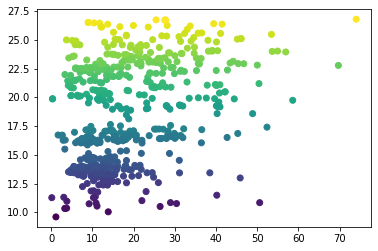

In [50]:
plt.scatter(Y_test,Y_predict,c=Y_predict)
plt.xlabel="True values"
plt.ylabel="Predictions"
plt.show()

In [51]:

dff=pd.concat([X_test,Y_test],axis=1)
print(dff)

      Reference area  Source    Time   Male  Female
708               92      43  2013.0  11.64   10.62
94                10      39  2015.0  13.12   35.88
217               20      76  2010.0  28.36   28.15
412               48      75  2018.0  18.57   36.54
327               39      43  2009.0  13.36   13.49
...              ...     ...     ...    ...     ...
202               17       6  2011.0  10.89   23.18
1020             138      76  2011.0  11.36   30.01
1096             148      43  2017.0  13.77   12.84
848              113      43  2018.0   4.20    4.15
359               42      43  2016.0   5.51    8.56

[311 rows x 5 columns]


In [52]:
model.predict([[  134         ,57      ,2009.0         ]])[0]
def Predict(value):
    d=model.predict([value])
    return "  male predictions : "+str(d[0][0])+"// femelles predictions : "+str(d[0][1])
print(dff["Reference area"].value_counts())
#making a little prediction fuction in order to remove the pain of sklearn commands

156    7
129    6
56     6
125    5
49     5
38     5
122    5
50     5
11     4
107    4
24     4
47     4
144    4
69     4
76     4
130    4
44     4
153    4
175    4
162    4
32     4
46     4
2      4
172    4
103    3
120    3
94     3
29     3
123    3
121    3
27     3
77     3
39     3
74     3
97     3
116    3
80     3
85     3
48     3
19     3
73     3
10     3
174    3
173    3
171    3
166    3
53     3
4      3
42     3
41     3
93     3
16     3
140    3
133    3
131    3
79     2
68     2
62     2
82     2
60     2
57     2
70     2
88     2
71     2
63     2
92     2
15     2
132    2
168    2
167    2
164    2
7      2
152    2
8      2
149    2
148    2
143    2
99     2
17     2
117    2
128    2
113    2
100    2
104    2
127    2
106    2
22     2
119    2
21     2
23     1
43     1
5      1
3      1
45     1
33     1
20     1
1      1
30     1
179    1
52     1
55     1
177    1
170    1
160    1
158    1
157    1
154    1
151    1
147    1
145    1
142    1
1

In [53]:
Predict([125,69,2017.0])

'  male predictions : 15.759723736476122// femelles predictions : 23.282506082892585'